# CNCITY dataset (exploratory data analysis)

<b> #1. importing necessary packages </b>


In [237]:
import pandas as pd
import csv

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [235]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np



In [236]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [238]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import tqdm as tqdm
from tabulate import tabulate

# not_preprocessed 
<b> not_preprocessed: smaller dataset, about 59562 rows, csv file </b>

In [96]:
not_preprocessed = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week 3/CNCITY/Machine6_20240604(3).csv')

In [97]:
not_preprocessed.head()

,machine_code,day,time,door_open,electricity_1,electricity_2,gas_leak,is_maintenance,machine_type,network_status,...,power_on,pressure_1,pressure_2,ssv1,ssv2,status_electricity_1,status_electricity_2,status_pressure_1,status_pressure_2,weektime
0,1,20240604,161255,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
1,1,20240604,161254,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
2,1,20240604,161253,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
3,1,20240604,161252,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
4,1,20240604,161251,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0


In [99]:
not_preprocessed.head()

,machine_code,day,time,door_open,electricity_1,electricity_2,gas_leak,is_maintenance,machine_type,network_status,...,power_on,pressure_1,pressure_2,ssv1,ssv2,status_electricity_1,status_electricity_2,status_pressure_1,status_pressure_2,weektime
0,1,20240604,161255,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
1,1,20240604,161254,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
2,1,20240604,161253,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
3,1,20240604,161252,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
4,1,20240604,161251,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0


In [100]:
not_preprocessed[' machine_code '].value_counts()

 machine_code 
1                 58041
 machine_code       507
--------------      507
Name: count, dtype: int64

In [101]:
not_preprocessed.shape

(59562, 22)

In [102]:
# if machine_code != int then delete row
not_preprocessed.columns

print(not_preprocessed[' machine_code '])
sum=0
# for row in not_preprocessed[' machine_code ']: # doesn't work!
#     if row != '1':
#         not_preprocessed.drop(row)

0        1
1        1
2        1
3        1
4        1
        ..
59557    1
59558    1
59559    1
59560    1
59561    1
Name:  machine_code , Length: 59562, dtype: object


In [103]:
mask = not_preprocessed[' machine_code '] != '1' #create a boolean that returns true if 'machine_code' == '1'

new_df = not_preprocessed[~mask] # if boolean is false then drop row 

# print the resulting DataFrame
print(new_df)

# new_df[' machine_code '].value_counts()

       machine_code  day       time    door_open  electricity_1   \
0                  1  20240604  161255          0          -1375   
1                  1  20240604  161254          0          -1375   
2                  1  20240604  161253          0          -1375   
3                  1  20240604  161252          0          -1375   
4                  1  20240604  161251          0          -1375   
...              ...       ...     ...        ...            ...   
59557              1  20240604       4          0          -1378   
59558              1  20240604       3          0          -1378   
59559              1  20240604       2          0          -1378   
59560              1  20240604       1          0          -1378   
59561              1  20240604       0          0          -1379   

      electricity_2  gas_leak  is_maintenance  machine_type  network_status   \
0                  0         0               0             1               0   
1                  0   

 machine_code 
1    58041
Name: count, dtype: int64

In [104]:
new_df.head()

,machine_code,day,time,door_open,electricity_1,electricity_2,gas_leak,is_maintenance,machine_type,network_status,...,power_on,pressure_1,pressure_2,ssv1,ssv2,status_electricity_1,status_electricity_2,status_pressure_1,status_pressure_2,weektime
0,1,20240604,161255,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
1,1,20240604,161254,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
2,1,20240604,161253,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
3,1,20240604,161252,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0
4,1,20240604,161251,0,-1375,0,0,0,1,0,...,0,0.785,2.088,0,0,0,0,0,0,0


In [118]:
pressure_1 = new_df['pressure_1 '] 

In [241]:
for col in new_df.columns: #traverses through the dataset and converts the values into floats 
    new_df[col] = new_df[col].astype(str).astype(float)
    
new_df.columns

/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/1312525321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].astype(str).astype(float)
/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/1312525321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].astype(str).astype(float)
/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/1312525321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Index([' machine_code ', 'day      ', 'time   ', 'door_open ',
       'electricity_1 ', 'electricity_2 ', 'gas_leak ', 'is_maintenance ',
       'machine_type ', 'network_status ', 'outside_temperature ',
       'panel_open ', 'power_on ', 'pressure_1 ', 'pressure_2 ', 'ssv1 ',
       'ssv2 ', 'status_electricity_1 ', 'status_electricity_2 ',
       'status_pressure_1 ', 'status_pressure_2 ', 'weektime'],
      dtype='object')

In [242]:
new_df[ 'status_pressure_1 ']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59557    0.0
59558    0.0
59559    0.0
59560    0.0
59561    0.0
Name: status_pressure_1 , Length: 58041, dtype: float64

In [137]:
print(new_df['pressure_1 '].value_counts()) 
avg_pressure = round(np.mean(new_df['pressure_1 ']),2)
print(avg_pressure)

pressure_1 
0.800    5932
0.799    5820
0.780    4742
0.798    3717
0.784    3456
0.786    3424
0.787    3265
0.777    2825
0.781    2809
0.785    2803
0.783    2800
0.792    2736
0.778    2572
0.779    2179
0.793    1647
0.782    1437
0.795    1408
0.794    1120
0.791     726
0.797     654
0.788     611
0.776     467
0.801     361
0.789     251
0.796     159
0.790     120
Name: count, dtype: int64
0.79


# Visualization

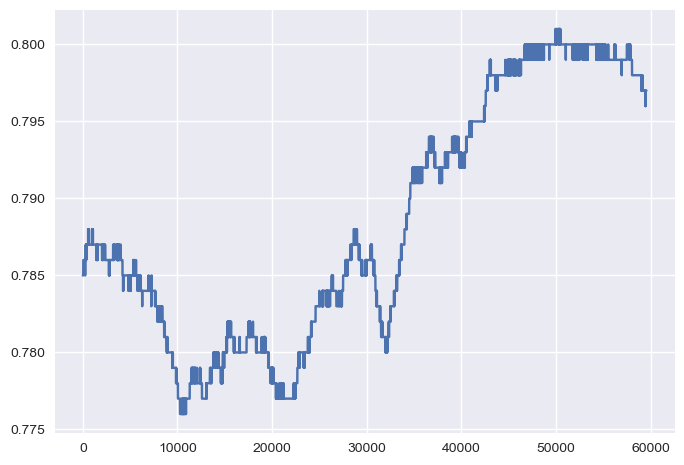

In [138]:
new_df['pressure_1 ']
plt.plot(new_df['pressure_1 '])
plt.show()

In [140]:
new_df.columns

Index([' machine_code ', 'day      ', 'time   ', 'door_open ',
       'electricity_1 ', 'electricity_2 ', 'gas_leak ', 'is_maintenance ',
       'machine_type ', 'network_status ', 'outside_temperature ',
       'panel_open ', 'power_on ', 'pressure_1 ', 'pressure_2 ', 'ssv1 ',
       'ssv2 ', 'status_electricity_1 ', 'status_electricity_2 ',
       'status_pressure_1 ', 'status_pressure_2 ', 'weektime'],
      dtype='object')

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


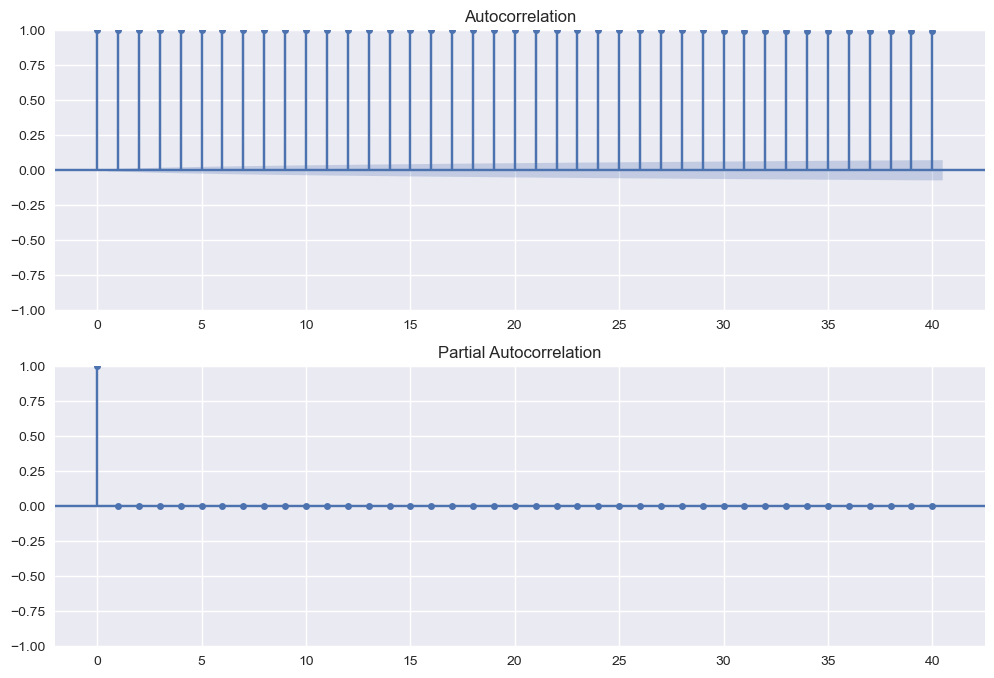

In [142]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df['pressure_1 '].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['gas_leak '].dropna(),lags=40,ax=ax2)

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


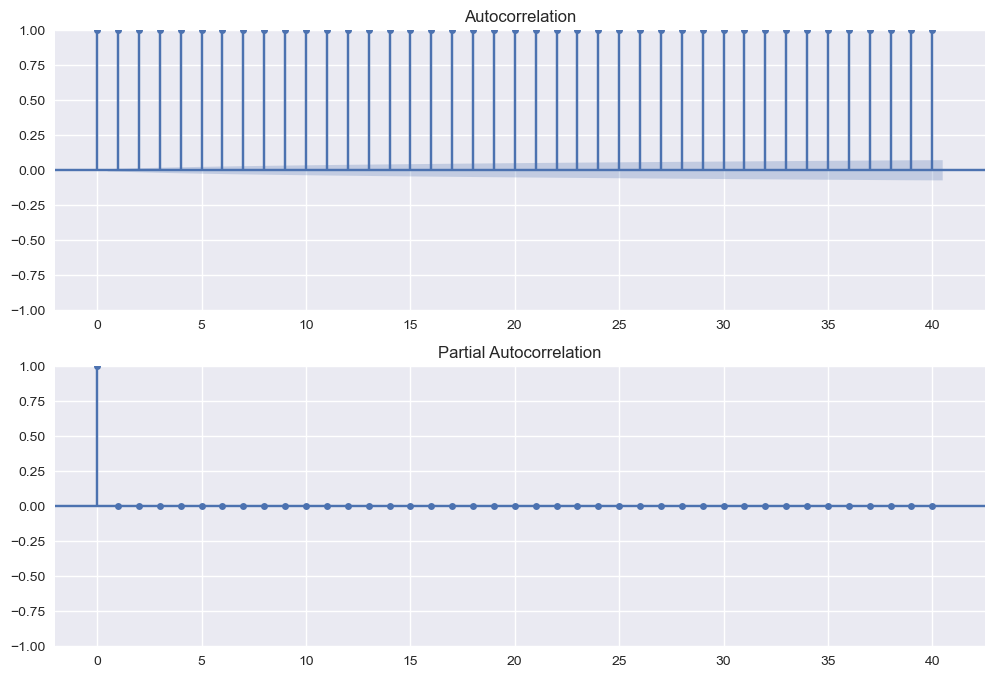

In [277]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df['outside_temperature '].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['gas_leak '].dropna(),lags=40,ax=ax2)

# Time plot 


In [146]:
 # Set pyplot style
plt.style.use("seaborn")

# Plot
print(new_df['pressure_2 '])

0        2.088
1        2.088
2        2.088
3        2.088
4        2.088
         ...  
59557    2.133
59558    2.133
59559    2.133
59560    2.133
59561    2.137
Name: pressure_2 , Length: 58041, dtype: float64


/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/1616869694.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [148]:
print(new_df['electricity_1 '])

0       -1375.0
1       -1375.0
2       -1375.0
3       -1375.0
4       -1375.0
          ...  
59557   -1378.0
59558   -1378.0
59559   -1378.0
59560   -1378.0
59561   -1379.0
Name: electricity_1 , Length: 58041, dtype: float64


In [219]:
new_df['day      '] = new_df['day      '].astype(int)

/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/1630640861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day      '] = new_df['day      '].astype(int)


In [218]:
new_df.columns

Index([' machine_code ', 'day      ', 'time   ', 'door_open ',
       'electricity_1 ', 'electricity_2 ', 'gas_leak ', 'is_maintenance ',
       'machine_type ', 'network_status ', 'outside_temperature ',
       'panel_open ', 'power_on ', 'pressure_1 ', 'pressure_2 ', 'ssv1 ',
       'ssv2 ', 'status_electricity_1 ', 'status_electricity_2 ',
       'status_pressure_1 ', 'status_pressure_2 ', 'weektime'],
      dtype='object')

In [245]:
new_df.dtypes

 machine_code            float64
day                      float64
time                     float64
door_open                float64
electricity_1            float64
electricity_2            float64
gas_leak                 float64
is_maintenance           float64
machine_type             float64
network_status           float64
outside_temperature      float64
panel_open               float64
power_on                 float64
pressure_1               float64
pressure_2               float64
ssv1                     float64
ssv2                     float64
status_electricity_1     float64
status_electricity_2     float64
status_pressure_1        float64
status_pressure_2        float64
weektime                 float64
dtype: object

/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/2053416168.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Date')

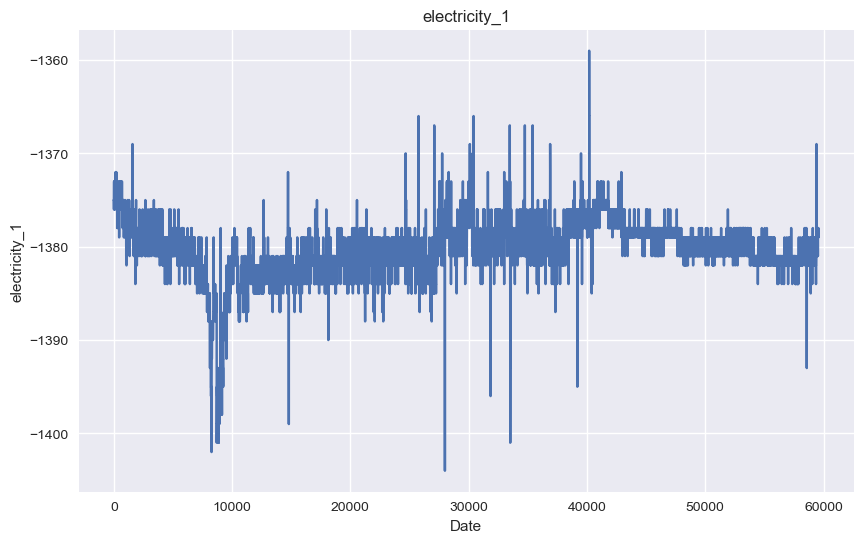

In [246]:
# Set pyplot style
plt.style.use("seaborn")

# Plot
new_df['electricity_1 '].plot(title='electricity_1', figsize=(10,6))
plt.ylabel('electricity_1')
plt.xlabel('Date')

In [229]:
new_df['time   '] = new_df['time   '].astype(int)

/var/folders/0p/h2wvnw8s7xb3jbc5v4dch9q80000gn/T/ipykernel_2532/3213319266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['time   '] = new_df['time   '].astype(int)


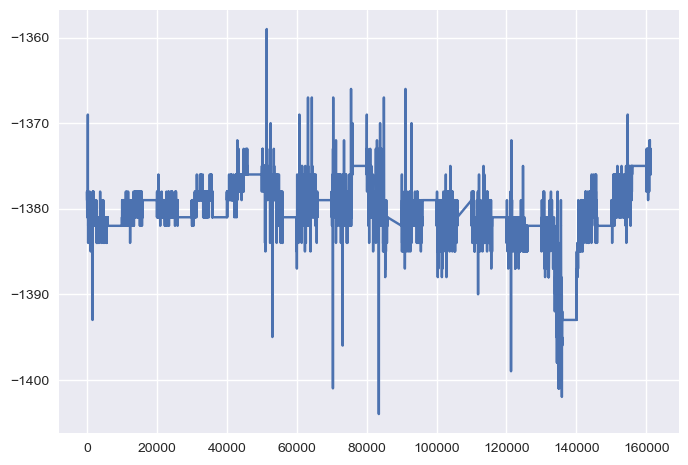

In [230]:
plt.plot(new_df['time   '], new_df['electricity_1 '])

# Real time data - about 6 million+ rows, attempting to read it line by line

In [247]:
big_df_path = '/Users/annikaseo-yeonkim/Downloads/cncity_data/Machine1.csv'

In [248]:
def remove_char(this_char,row):
    that_row = row[0].split()
    new_row = []
    for char in that_row:
        if char != this_char:
            new_row.append(char)

    return new_row

In [253]:
def process_row(row):
    row = remove_char("|",row)
    return row
    

In [250]:
row_limit = 100

In [260]:
def count_rows_and_columns(file_path): # still debugging, same code as the one below but with tqdm and progress bar 
    row_count = 0
    column_count = 0
    
    # First, get the total number of lines to initialize tqdm
    with open(file_path, mode='r', encoding='utf-8') as file:
        total_lines = sum(1 for line in file)
    
    # Now read the file again with tqdm progress bar
    with open(file_path, mode='r', encoding='utf-8') as file:
        for line in tqdm.tqdm(file, total=total_lines, desc="Processing rows"):
            row_count += 1
            if row_count == 1:
                column_count = len(line.split(','))

    return row_count, column_count

# count_rows_and_columns(big_df_path)

In [259]:
def count_rows_and_columns(file_path):
    row_count = 0
    col_count = 0
    with open(file_path, mode='r', encoding='utf-8') as file:
        for line in file:
            row_count += 1
            if row_count == 1:
                # Assume the file is comma-separated
                column_count = len(line.split(','))

    return row_count, column_count
    
count_rows_and_columns(big_df_path)

(63690454, 1)

In [257]:
big_df_path = '/Users/annikaseo-yeonkim/Downloads/cncity_data/Machine1.csv'
rowList = []
try:
    with open(big_df_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        for row_number, row in enumerate(csv_reader, start=1):
            if row_number > 500:
                break
            try:
                my_row = process_row(row)
                print(my_row)
                rowList.append(my_row)
            except Exception as e:
                print(f"Error processing row {row_number}: {e}")
except Exception as e:
    print(f"Error opening/reading file: {e}")

print("File processing completed.")



Error processing row 1: list index out of range
['machine_code', 'day', 'time', 'door_open', 'electricity_1', 'electricity_2', 'gas_leak', 'is_maintenance', 'machine_type', 'network_status', 'outside_temperature', 'panel_open', 'power_on', 'pressure_1', 'pressure_2', 'ssv1', 'ssv2', 'status_electricity_1', 'status_electricity_2', 'status_pressure_1', 'status_pressure_2', 'weektime']
['--------------+----------+--------+-----------+---------------+---------------+----------+----------------+--------------+----------------+---------------------+------------+----------+------------+------------+------+------+----------------------+----------------------+-------------------+-------------------+----------']
['1', '20220422', '235959', '0', '-1411', '0', '0', '0', 'null', '0', '14.5', '0', '0', '0.793', '2.025', '0', '0', '0', '0', '0', '0', '0']
['1', '20220422', '235958', '0', '-1411', '0', '0', '0', 'null', '0', '14.5', '0', '0', '0.793', '2.025', '0', '0', '0', '0', '0', '0', '0']
['1', 

In [201]:
print(rowList[0])

['machine_code', 'day', 'time', 'door_open', 'electricity_1', 'electricity_2', 'gas_leak', 'is_maintenance', 'machine_type', 'network_status', 'outside_temperature', 'panel_open', 'power_on', 'pressure_1', 'pressure_2', 'ssv1', 'ssv2', 'status_electricity_1', 'status_electricity_2', 'status_pressure_1', 'status_pressure_2', 'weektime']


In [261]:
headers = rowList[0]
headers_dict = {}
for i in range(len(headers)):
    headers_dict[i] = headers[i]
data = []
for i in range(1,len(rowList)):
    data.append(rowList[i])
data = data[1:]
table = tabulate(data,headers=headers,tablefmt = "grid")
table_df = pd.DataFrame(data)
table_df.rename(columns = headers_dict, inplace = True)
# print(headers_dict)
# print(table_df.head())
# print(table_df['panel_open'])

In [204]:
print(table_df) # machine_type????

    machine_code       day    time door_open electricity_1 electricity_2  \
0              1  20220422  235959         0         -1411             0   
1              1  20220422  235958         0         -1411             0   
2              1  20220422  235957         0         -1411             0   
3              1  20220422  235956         0         -1411             0   
4              1  20220422  235955         0         -1416             0   
..           ...       ...     ...       ...           ...           ...   
488            1  20220422  235159         0         -1408             0   
489            1  20220422  235158         0         -1408             0   
490            1  20220422  235157         0         -1408             0   
491            1  20220422  235156         0         -1411             0   
492            1  20220422  235155         0         -1411             0   

    gas_leak is_maintenance machine_type network_status  ... power_on  \
0          0  

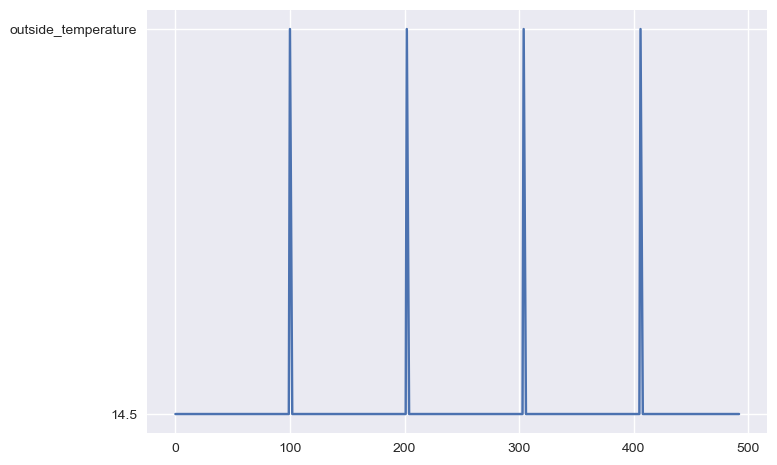

In [234]:
plt.plot(table_df['outside_temperature'].dropna())

In [170]:
chunk_size = 100000
for chunk in pd.DataFrame(new_df).groupby(pd.DataFrame(new_df).index//chunk_size):
    print(chunk)

# day, time --> day, time object (not floats)

(0,         machine_code    day         time     door_open   electricity_1   \
0                 1.0  20240604.0  161255.0         0.0         -1375.0   
1                 1.0  20240604.0  161254.0         0.0         -1375.0   
2                 1.0  20240604.0  161253.0         0.0         -1375.0   
3                 1.0  20240604.0  161252.0         0.0         -1375.0   
4                 1.0  20240604.0  161251.0         0.0         -1375.0   
...               ...         ...       ...         ...             ...   
59557             1.0  20240604.0       4.0         0.0         -1378.0   
59558             1.0  20240604.0       3.0         0.0         -1378.0   
59559             1.0  20240604.0       2.0         0.0         -1378.0   
59560             1.0  20240604.0       1.0         0.0         -1378.0   
59561             1.0  20240604.0       0.0         0.0         -1379.0   

       electricity_2   gas_leak   is_maintenance   machine_type   \
0                 0.0      

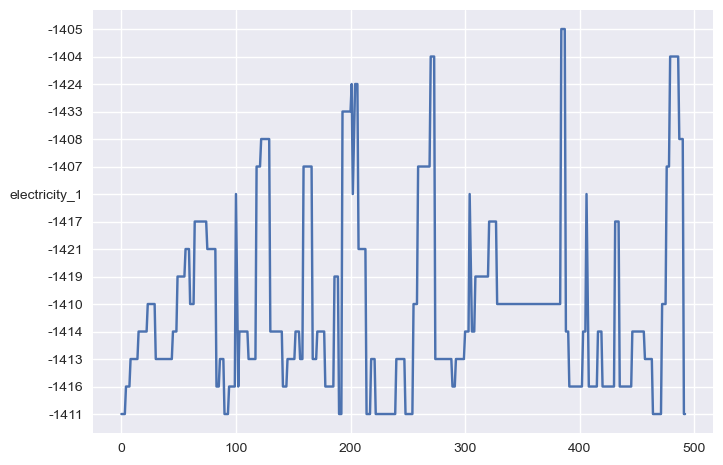

In [256]:
plt.plot(table_df['electricity_1'].dropna())

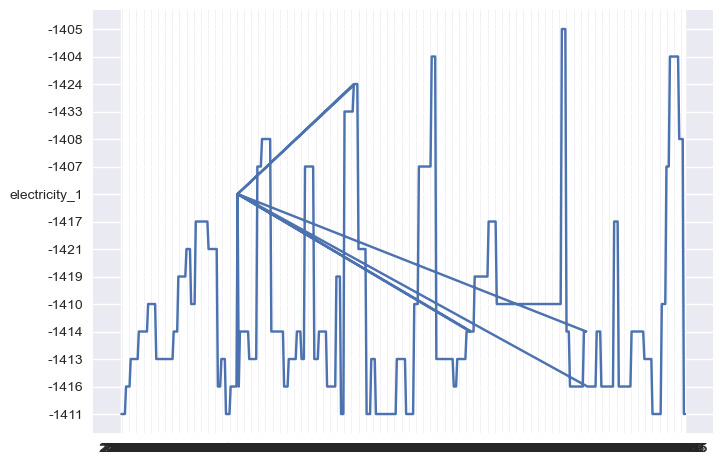

In [224]:
plt.plot(table_df['time'].dropna(),table_df['electricity_1'].dropna()) #need to sort them first (hahaha)

In [263]:
print(table_df['pressure_1'])

0      0.793
1      0.793
2      0.793
3      0.793
4      0.793
       ...  
488    0.793
489    0.793
490    0.793
491    0.793
492    0.793
Name: pressure_1, Length: 493, dtype: object


In [289]:
table_df.columns

Index(['machine_code', 'day', 'time', 'door_open', 'electricity_1',
       'electricity_2', 'gas_leak', 'is_maintenance', 'machine_type',
       'network_status', 'outside_temperature', 'panel_open', 'power_on',
       'pressure_1', 'pressure_2', 'ssv1', 'ssv2', 'status_electricity_1',
       'status_electricity_2', 'status_pressure_1', 'status_pressure_2',
       'weektime'],
      dtype='object')

# linear regression: 'pressure_1' and 'is_maintenance'

In [311]:
model = LinearRegression()


In [335]:
pressure_2_list = list(table_df['pressure_2'].dropna())
new_2_list = []
for item in pressure_2_list:
    if item != 'pressure_2':
        new_2_list.append(item)

print(new_2_list)

['2.025', '2.025', '2.025', '2.025', '2.025', '2.025', '2.025', '2.025', '2.024', '2.024', '2.024', '2.024', '2.024', '2.024', '2.024', '2.022', '2.022', '2.022', '2.022', '2.024', '2.024', '2.024', '2.024', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.027', '2.027', '2.027', '2.027', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.029', '2.033', '2.033', '2.033', '2.033', '2.031', '2.031', '2.031', '2.031', '2.031', '2.031', '2.031', '2.027', '2.027', '2.027', '2.027', '2.034', '2.034', '2.034', '2.034', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.042', '2.047', '2.047', '2.047', '2.047', '2.047', '2.047', '2.047', '2.047', '2.04', '2.04', '2.04', '2.027', '2.027', '2.027', '2.027', '2.02', '2.02', '2.02', '2.02', '2.027', '2.027', '2.027', '2.027', '2.027', '2.027', '2.027', '2.038', '2.038', '2.038', '2.038', '2.049', '2.049', '2.049', '2.049', '2.049', '2.049', '2.049'

In [336]:
new_maintenance_list = []
for item in list(table_df['is_maintenance']):
    if item == 'is_maintenance':
        new_maintenance_list.append(1)
    else:
        new_maintenance_list.append(item)

In [337]:
pressure_2_array = np.array(new_2_list)
new_maintenance_array = np.array(new_maintenance_list)

In [338]:
model.fit(pressure_2_array.reshape(-1,1), new_maintenance_array)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.